## __EDA総括__
---
- 1. 欠損
    - (a)MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, CPI, Unemploymentが欠損あり
    - (b)CPI, Unemploymentについてはトレンドがありそう
        - __移動平均線での欠損補間ができそう__
    - (f)Weekly_Salesについて、Storeごとの　 '各' Deptについて基本的に143期あるが、一部かけている
        - __自己回帰モデル等実装する場合、補間が必要__
---
- 2. Weekly_Salesの傾向
    - (c)Deptごとの '全ての' StoreのWeekly_Salesの描画
        - トレンドは似ているが、Weekly_Salesの上限などは大きく異なる
    - (d)Storeごとの '全ての' DeptのWeekly_Salesの描画
        - トレンドは似ているが、Weekly_Salesの上限などは大きく異なる
            - __周期性があることを確認__
            - __トレンドは似ているが、目的変数のスケールが大きく異なることが多い（バリエーションが多すぎるのでStoreごとの　'各'　Deptについてモデル作成した方が良い？）__
    - (e)Storeごとの '各' DeptについてWeekly_Salesの描画
        - __大きなイベントのみならず、月ごとの動向も例年類似すると判断__
---
- 3. 大きな発見が無かった試行
    - (g)全てのMarkDownの描画
        - anonymized data related to promotional markdownsはセール時期の売り上げかと仮定した。
        - MarkDown間の相関は高いと思ったが、解釈性が無かった(感覚的にはセール時期が重複するため、グラフは似ると思った)
        - anonymized dataとあり、単純な売り上げでは無いと理解
    - (h)boxplotの描画
        - typeAはstore sizeが大きい傾向、typeCは小さい傾向
        - sizeが大きくても顕著に売り上げが高いわけでないが相関はある

## __Features__
- Store — the store number
- Date — the week
- Temperature — the average temperature in the region
- Fuel_Price — the cost of fuel in the region
- MarkDown1–5 — anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011 and is not available for all stores all the time. Any missing value is marked with an NA.
- CPI — the consumer price index(消費者物価指数)
- Unemployment — the unemployment rate
- IsHoliday — whether the week is a special holiday week


#### For convenience, the four holidays fall within the following weeks in the dataset (not all holidays are in the data):

- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
- Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
- Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
- Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

#### Stores
- Store — the store number
- Type — three types of stores ‘A’, ‘B’ or ‘C’
- Size — the size of a store

infomation above is from [here](](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
features = pd.read_csv('../data/raw_data/features.csv')
sales_train = pd.read_csv('../data/raw_data/train.csv')
stores = pd.read_csv('../data/raw_data/stores.csv')
sales_test = pd.read_csv('../data/raw_data/test.csv')

In [4]:
features

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  2010-02-05        42.31       2.572        NaN        NaN   
1         1  2010-02-12        38.51       2.548        NaN        NaN   
2         1  2010-02-19        39.93       2.514        NaN        NaN   
3         1  2010-02-26        46.63       2.561        NaN        NaN   
4         1  2010-03-05        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  2013-06-28        76.05       3.639    4842.29     975.03   
8186     45  2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45  2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45  2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45  2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0           NaN        NaN        NaN  211.096358         8.106      False  
1           NaN        NaN        NaN  211.242170         8.106       True  
2           NaN        NaN        NaN  211.289143         8.106      False  
3           NaN        NaN        NaN  211.319643         8.106      False  
4           NaN        NaN        NaN  211.350143         8.106      False  
...         ...        ...        ...         ...           ...        ...  
8185       3.00    2449.97    3169.69         NaN           NaN      False  
8186     582.74    5797.47    1514.93         NaN           NaN      False  
8187      85.72     744.84    2150.36         NaN           NaN      False  
8188     204.19     363.00    1059.46         NaN           NaN      False  
8189       2.06      10.88    1864.57         NaN           NaN      False  

[8190 rows x 12 columns]

### (a)MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, CPI, Unemploymentが欠損あり

In [5]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

### (b)CPI, Unemploymentについてはトレンドがありそう

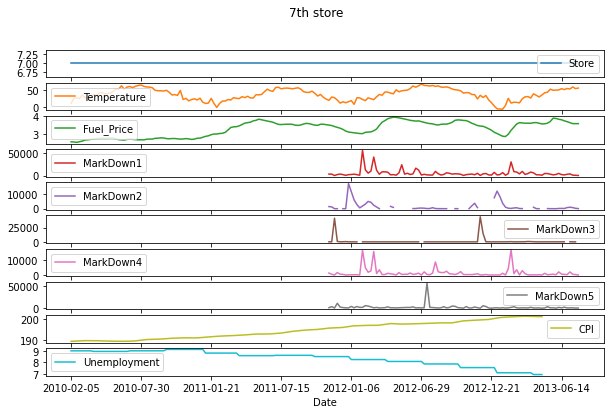

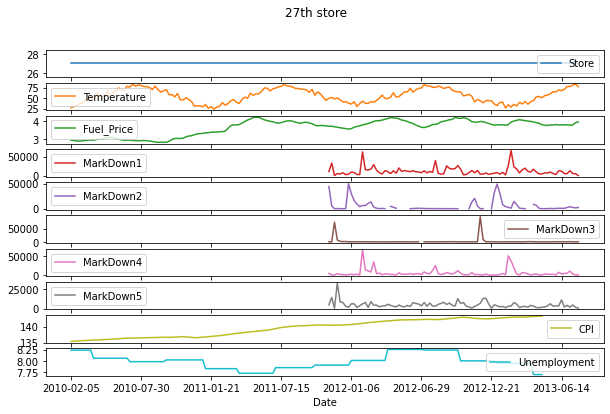

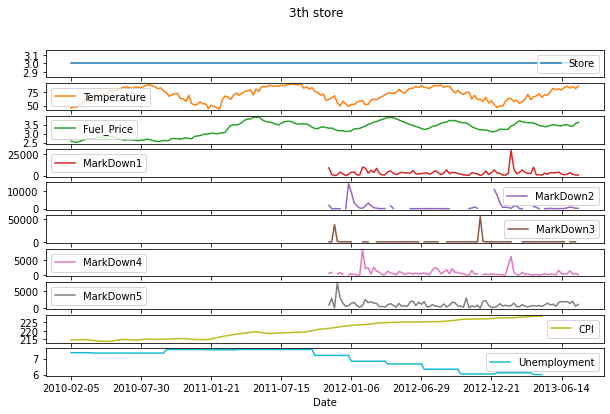

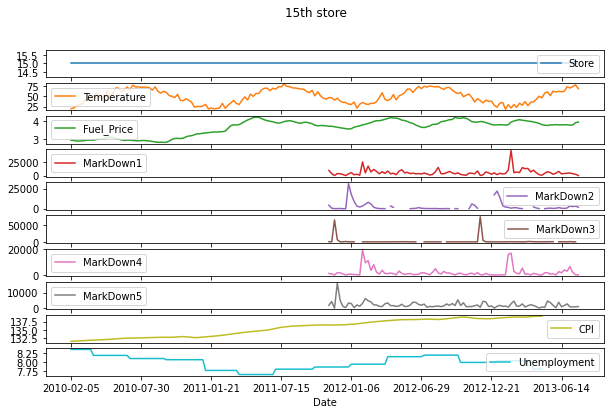

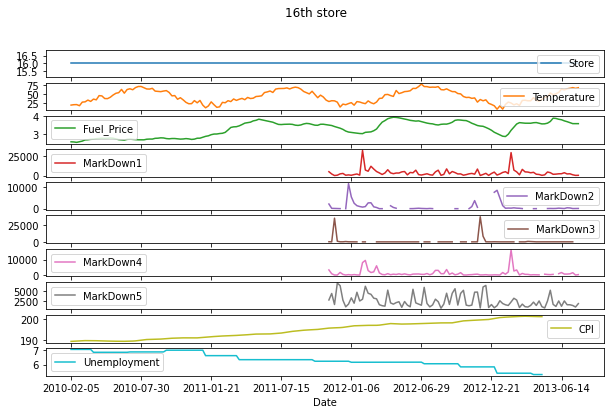

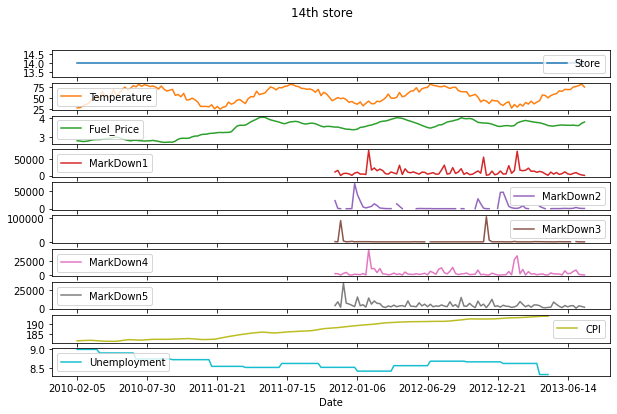

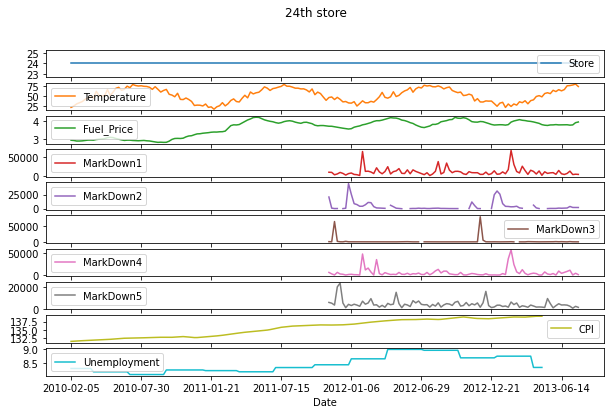

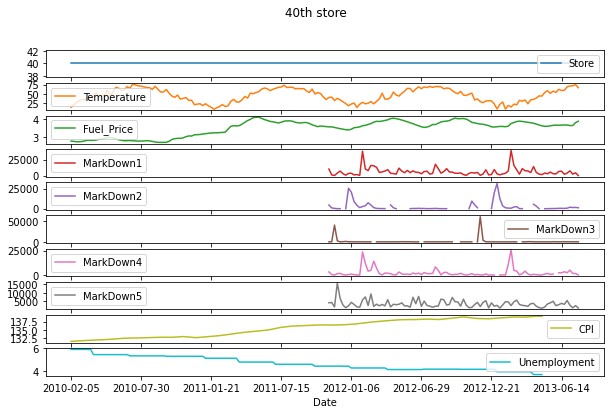

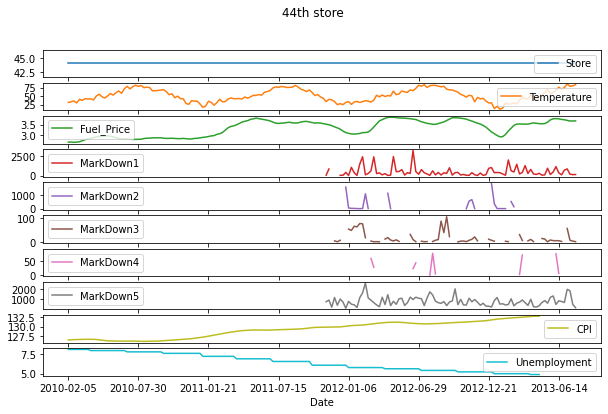

In [5]:
# featuresに関して、ランダムに抽出したstoreについて各特徴量を描画(x軸はDate)
for i in range(1, 10):
    random = np.random.randint(1, 46)
    features.groupby(['Store']).get_group(random)[list(features.columns)].plot(x='Date', subplots=True, figsize=(10,6), title='{}th store'.format(random))

### (g)全てのMarkDownの描画

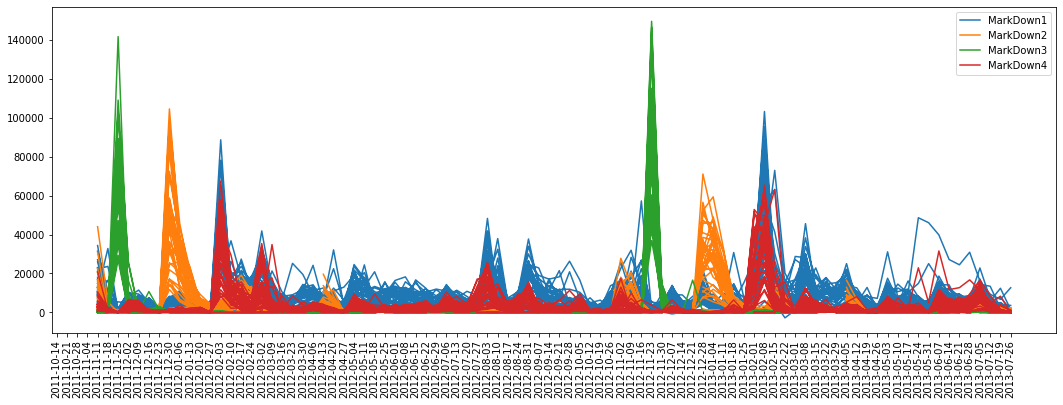

In [6]:
fig = plt.figure(figsize=(18, 6))
plt.plot(features['Date'], features['MarkDown1'], label='MarkDown1')
plt.xticks(rotation=90)

plt.plot(features['Date'], features['MarkDown2'], label='MarkDown2')
plt.xticks(rotation=90)

plt.plot(features['Date'], features['MarkDown3'], label='MarkDown3')
plt.xticks(rotation=90)

plt.plot(features['Date'], features['MarkDown4'], label='MarkDown4')
plt.xticks(rotation=90)

plt.legend()

In [6]:
df_all_train = sales_train.merge(features, how="left", on=["Store","Date","IsHoliday"]).merge(stores, how="left", on=["Store"])
df_all_test = sales_test.merge(features, how="left", on=["Store","Date","IsHoliday"]).merge(stores, how="left", on=["Store"])

import pendulum
df_all_train['WeekofMonth'] = df_all_train['Date'].apply(lambda x: pendulum.parse(x).week_of_month)
df_all_train['WeekofYear'] = df_all_train['Date'].apply(lambda x: pendulum.parse(x).week_of_year)
df_all_train['Date'] = pd.to_datetime(df_all_train['Date'])
df_all_train['Month'] = df_all_train['Date'].dt.month

### (h)boxplotの描画

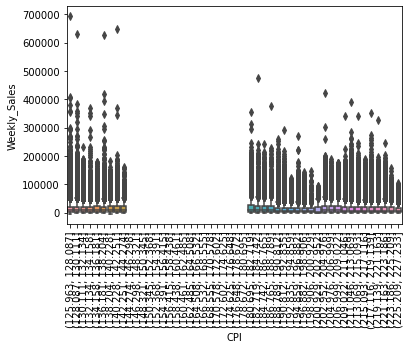

In [8]:
sns.boxplot(pd.cut(df_all_train['CPI'], 50), df_all_train['Weekly_Sales'])
plt.xticks(rotation=90)
plt.show()
plt.close()

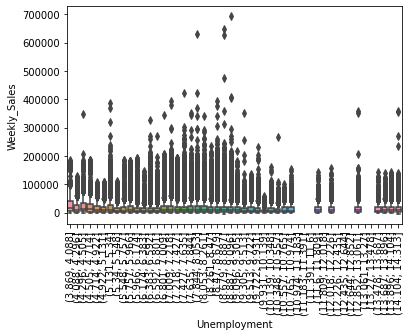

In [9]:
sns.boxplot(pd.cut(df_all_train['Unemployment'], 50), df_all_train['Weekly_Sales'])
plt.xticks(rotation=90)
plt.show()
plt.close()

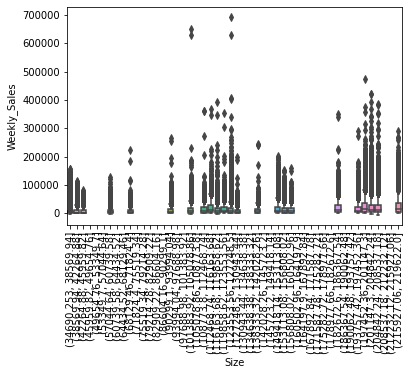

In [10]:
sns.boxplot(pd.cut(df_all_train['Size'], 50), df_all_train['Weekly_Sales'])
plt.xticks(rotation=90)
plt.show()
plt.close()

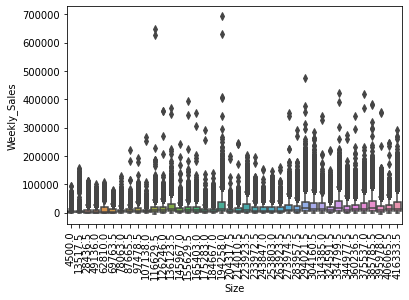

In [11]:
sns.boxplot(df_all_train['Size'].rank(), df_all_train['Weekly_Sales'])
plt.xticks(rotation=90)
plt.show()
plt.close()

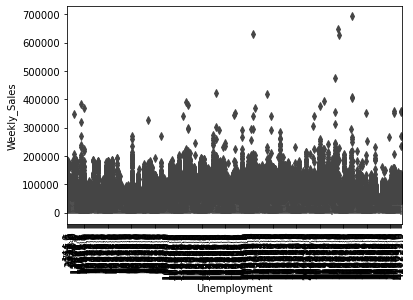

In [12]:
sns.boxplot(df_all_train['Unemployment'].rank(), df_all_train['Weekly_Sales'])
plt.xticks(rotation=90)
plt.show()
plt.close()

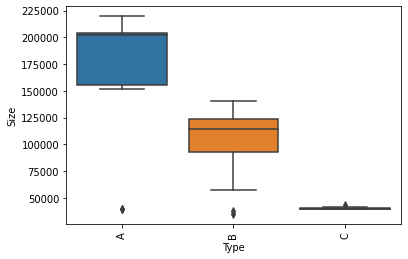

In [8]:
sns.boxplot(stores['Type'], stores['Size'])
plt.xticks(rotation=90)
plt.show()
plt.close()

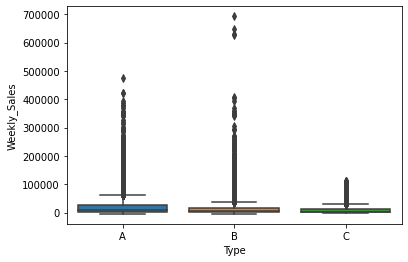

In [9]:
sns.boxplot(df_all_train['Type'], df_all_train['Weekly_Sales'])
plt.show()
plt.close()

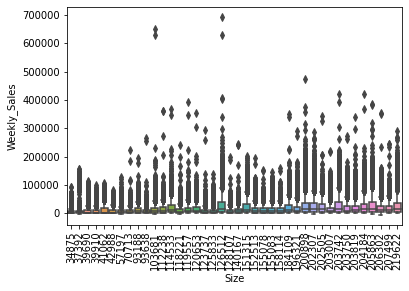

In [10]:
sns.boxplot(df_all_train['Size'], df_all_train['Weekly_Sales'])
plt.xticks(rotation=90)
plt.show()
plt.close()

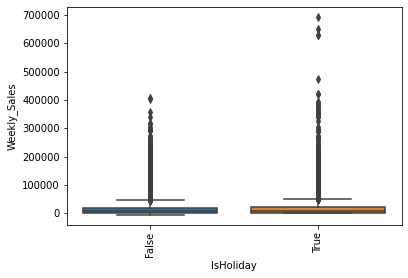

In [11]:
sns.boxplot(df_all_train['IsHoliday'], df_all_train['Weekly_Sales'])
plt.xticks(rotation=90)
plt.show()
plt.close()

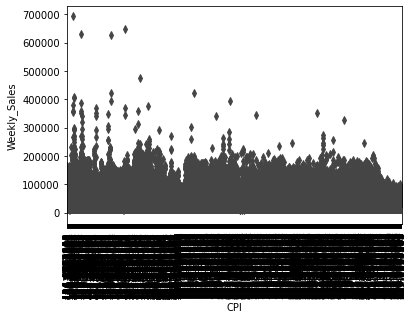

In [12]:
sns.boxplot(df_all_train['CPI'], df_all_train['Weekly_Sales'])
plt.xticks(rotation=90)
plt.show()
plt.close()

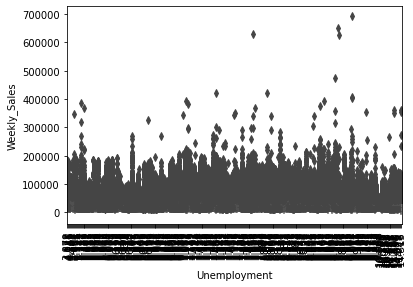

In [13]:
sns.boxplot(df_all_train['Unemployment'], df_all_train['Weekly_Sales'])
plt.xticks(rotation=90)
plt.show()
plt.close()

<AxesSubplot:xlabel='Month', ylabel='Temperature'>

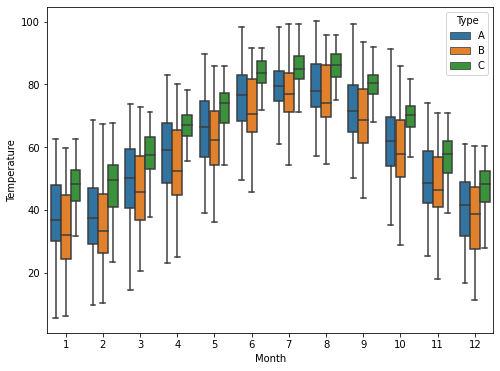

In [14]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='Month', y='Temperature', data=df_all_train, showfliers=False, hue='Type')

<AxesSubplot:xlabel='Month', ylabel='CPI'>

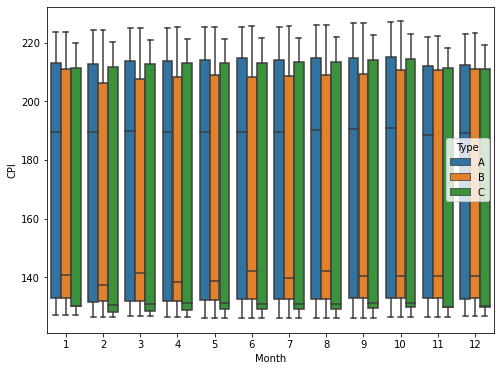

In [15]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='Month', y='CPI', data=df_all_train, showfliers=False, hue='Type')

<AxesSubplot:xlabel='Month', ylabel='Unemployment'>

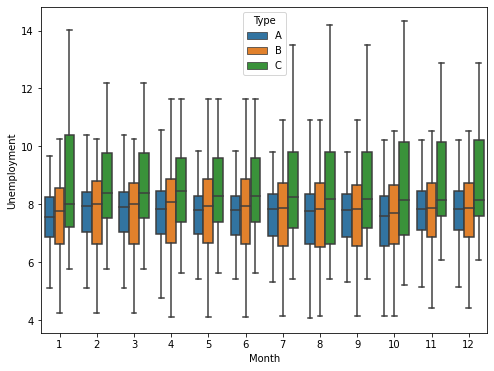

In [16]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='Month', y='Unemployment', data=df_all_train, showfliers=False, hue='Type')

<AxesSubplot:xlabel='Month', ylabel='Weekly_Sales'>

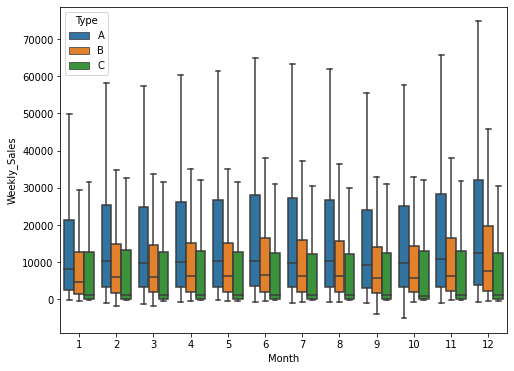

In [17]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='Month', y='Weekly_Sales', data=df_all_train, showfliers=False, hue='Type')

<AxesSubplot:xlabel='Month', ylabel='Size'>

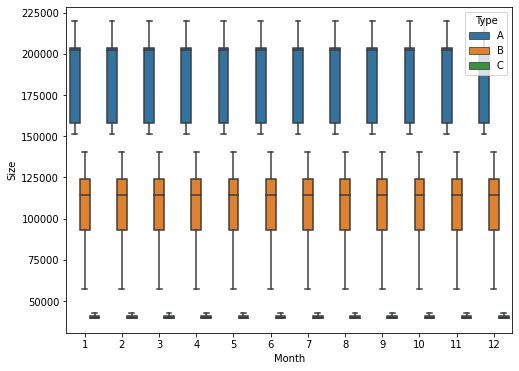

In [18]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='Month', y='Size', data=df_all_train, showfliers=False, hue='Type')

<AxesSubplot:xlabel='WeekofMonth', ylabel='Weekly_Sales'>

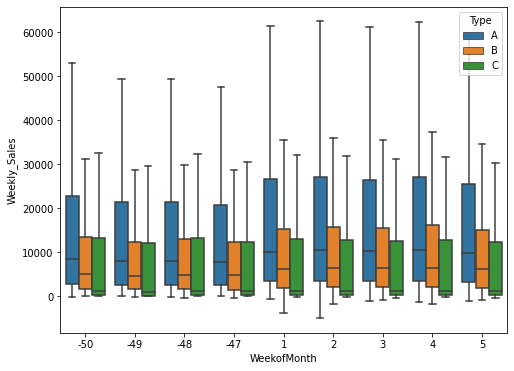

In [19]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='WeekofMonth', y='Weekly_Sales', data=df_all_train, showfliers=False, hue='Type')

<AxesSubplot:xlabel='Month', ylabel='Weekly_Sales'>

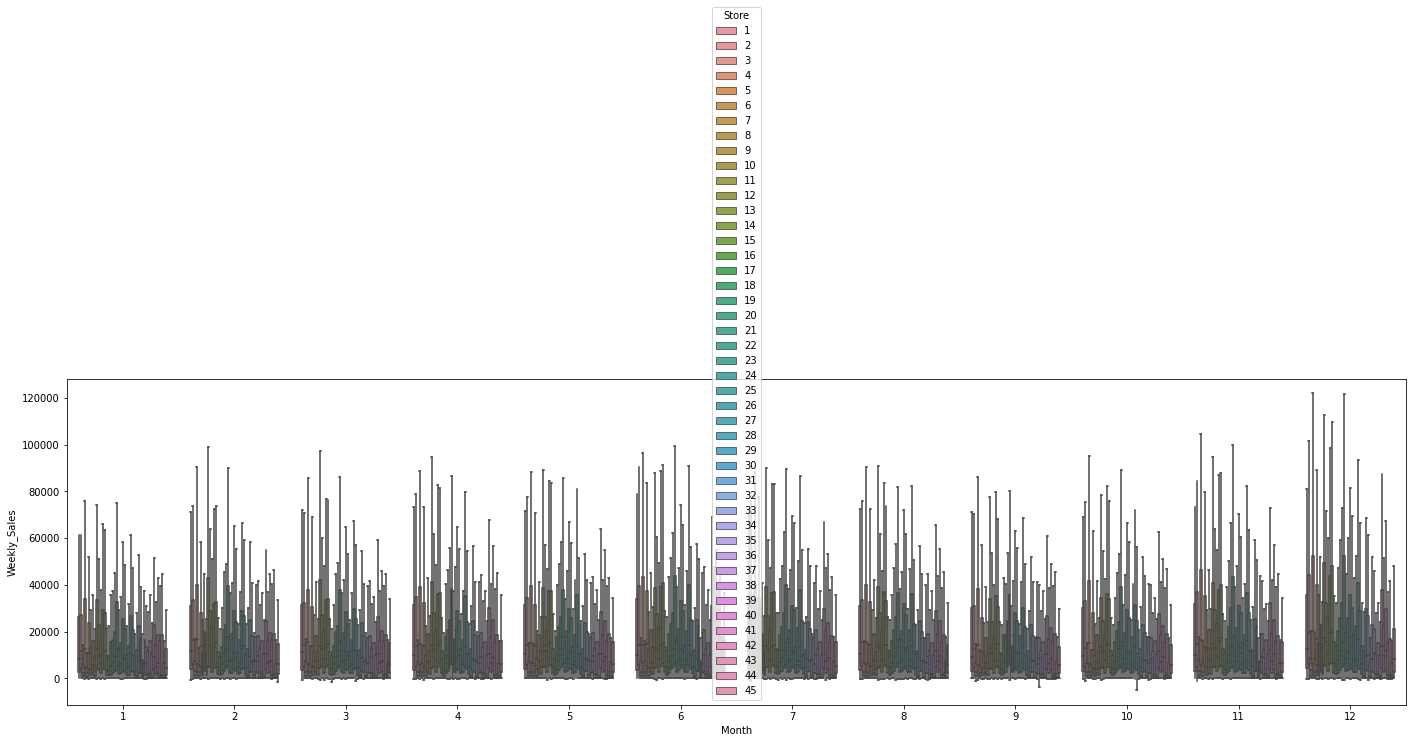

In [20]:
f, ax = plt.subplots(figsize=(24, 6))
sns.boxplot(x='Month', y='Weekly_Sales', data=df_all_train, showfliers=False, hue='Store')

<AxesSubplot:xlabel='Month', ylabel='Weekly_Sales'>

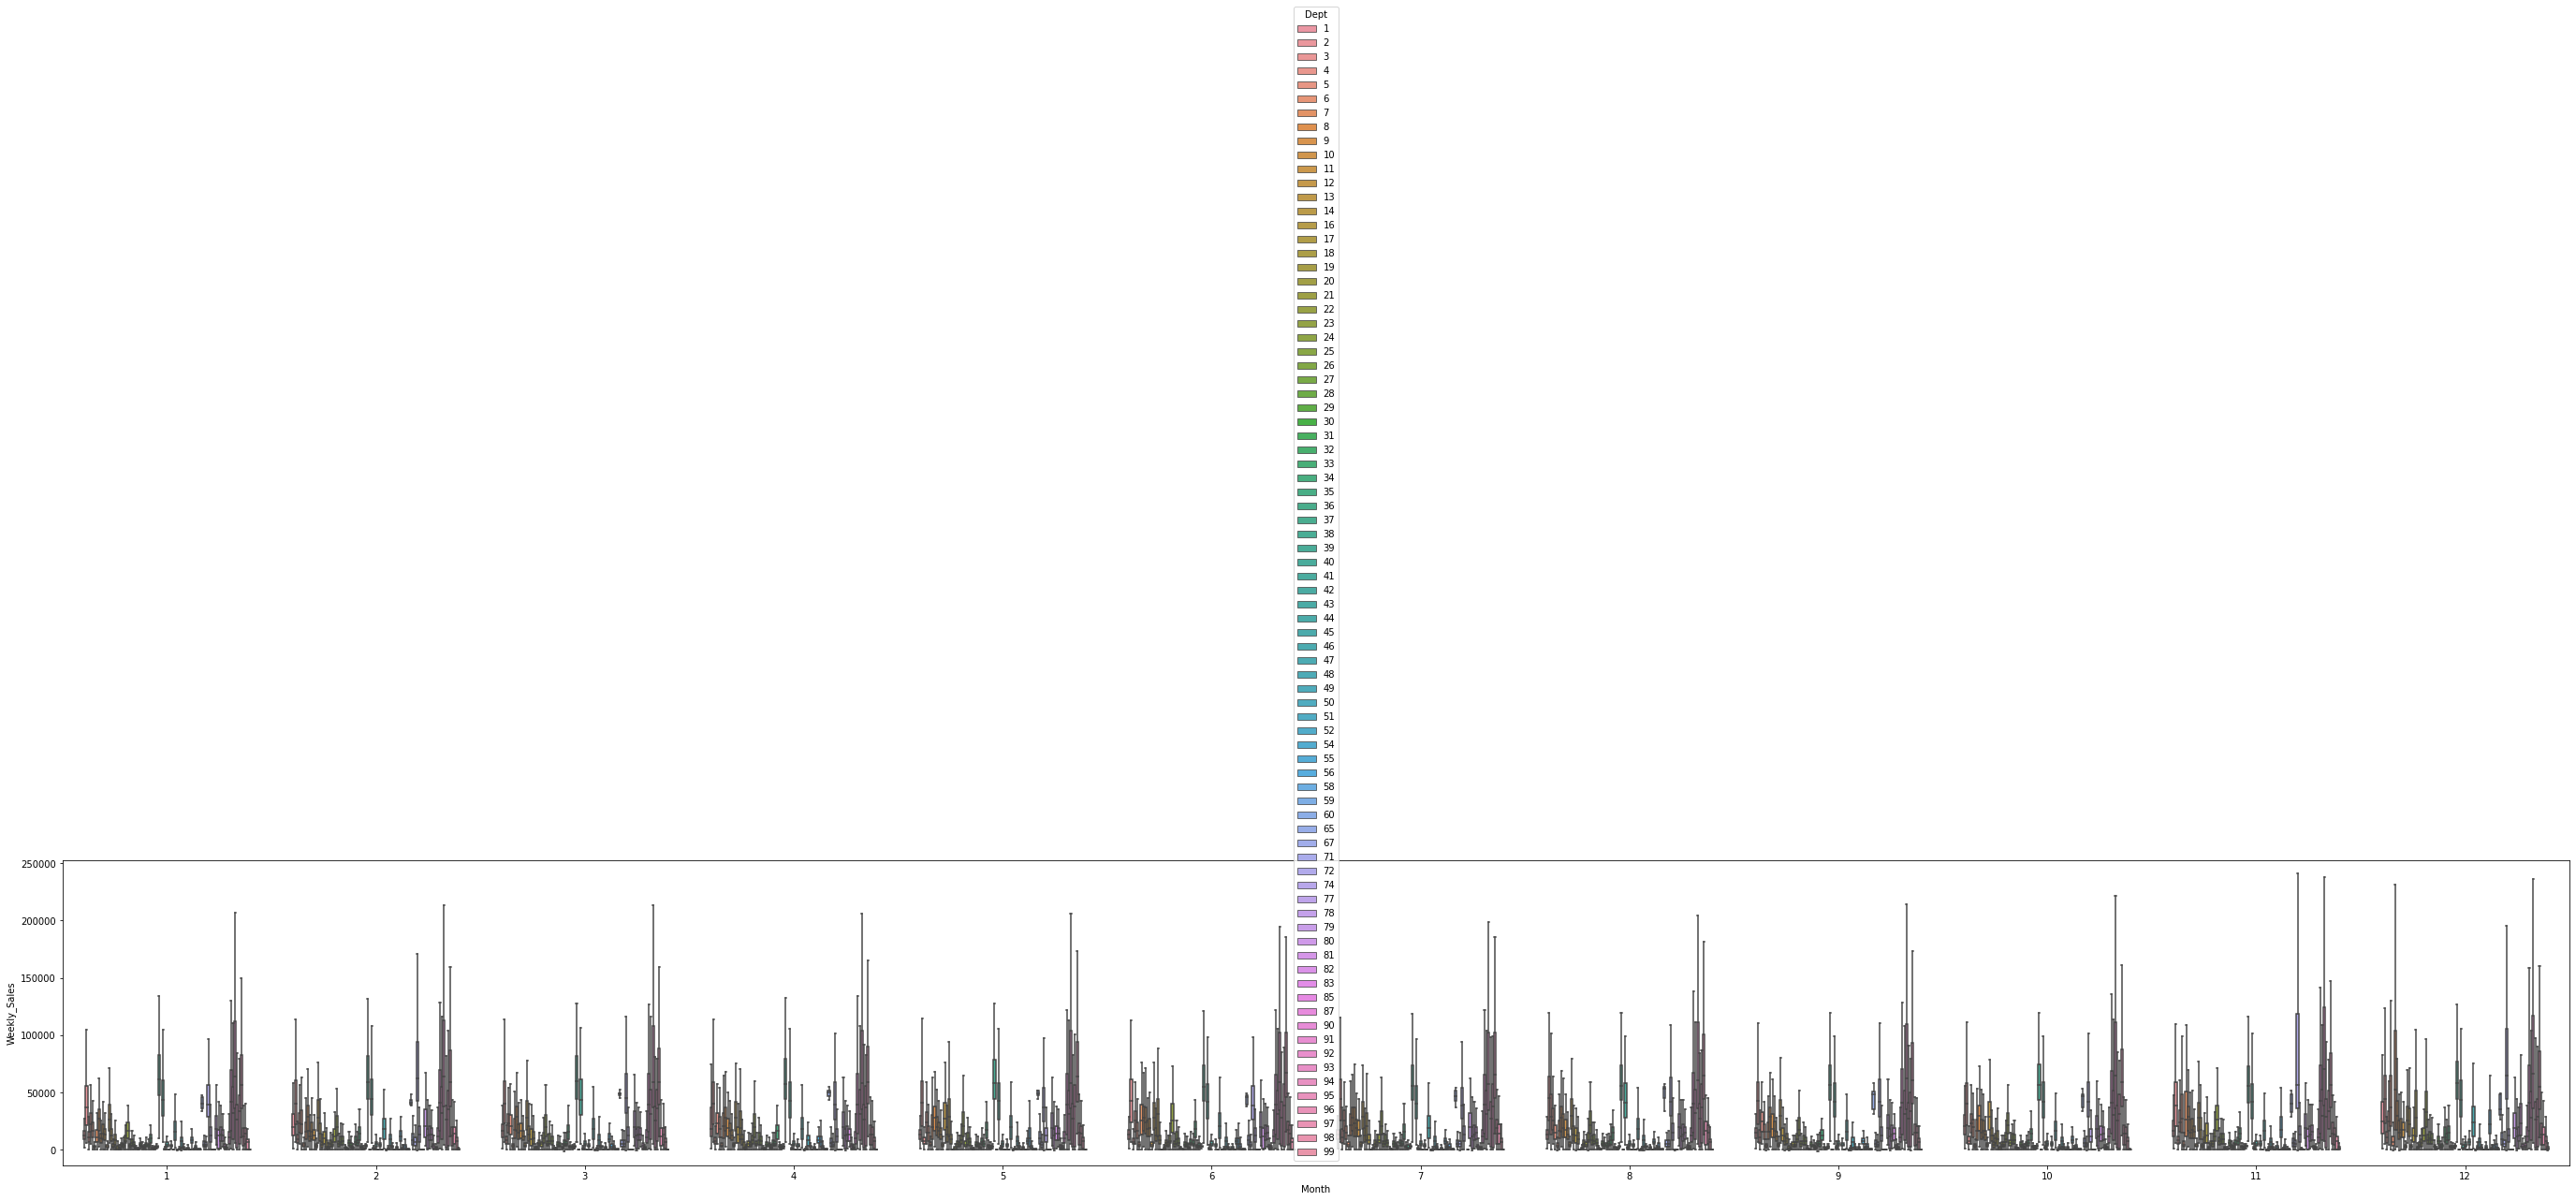

In [21]:
f, ax = plt.subplots(figsize=(48, 6))
sns.boxplot(x='Month', y='Weekly_Sales', data=df_all_train, showfliers=False, hue='Dept')

<AxesSubplot:xlabel='WeekofMonth', ylabel='Weekly_Sales'>

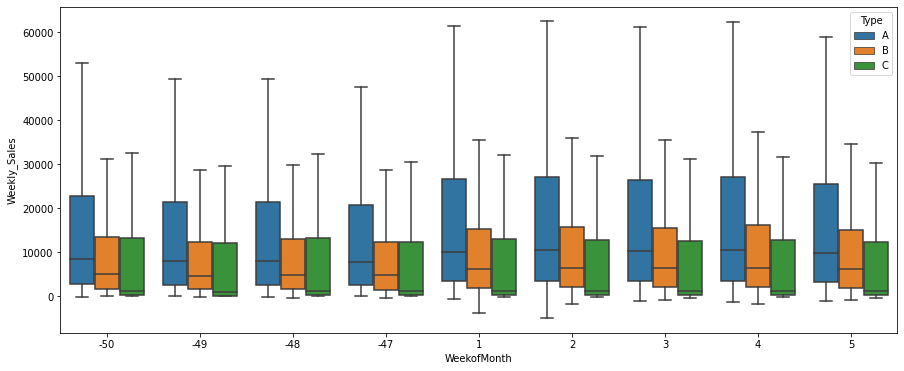

In [22]:
f, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x='WeekofMonth', y='Weekly_Sales', data=df_all_train, showfliers=False, hue='Type')

### (c)Deptごとの '全ての' StoreのWeekly_Salesの描画

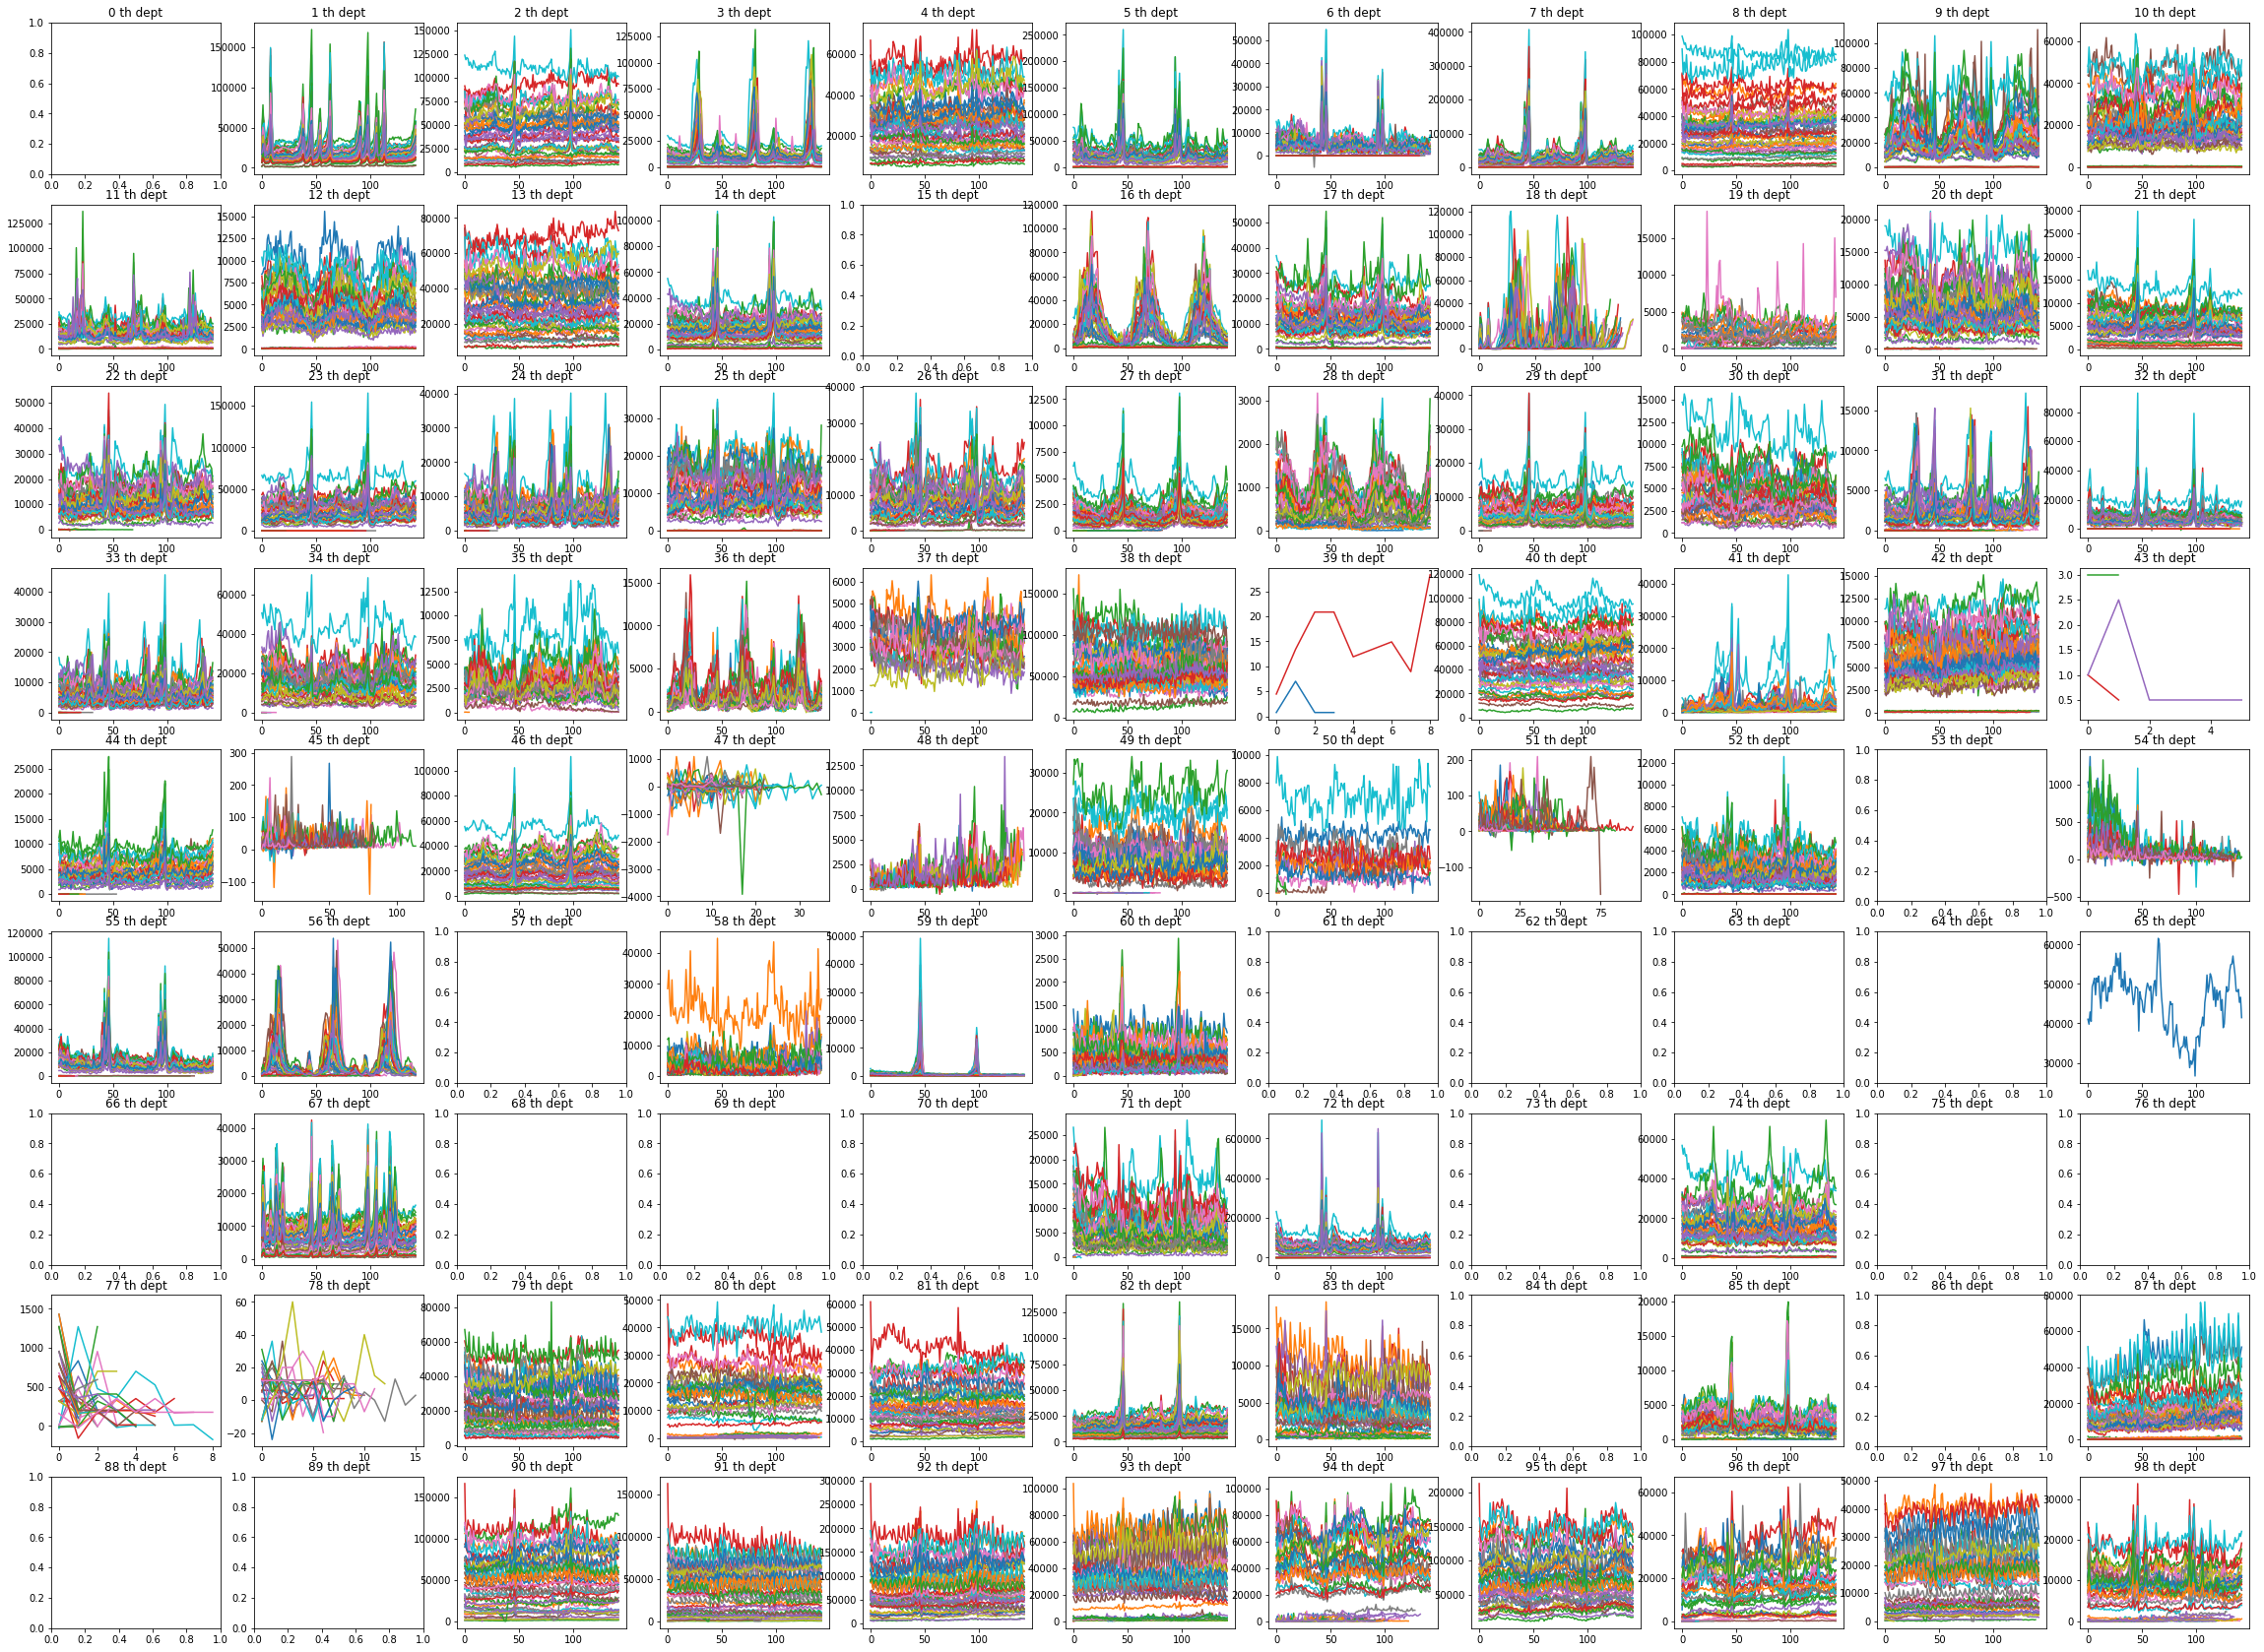

In [23]:
row, col = 9, 11
num = 0

plt.figure(figsize=(40,30))
while num < row * col:
    for dept in range(99):
        flg = True
        num += 1
        plt.subplot(row, col, num)
        plt.title('{} th dept'.format(dept))
        for store in range(50): 
            try:
                per_store = df_all_train.groupby('Store').get_group(store)
                per_dept = per_store.groupby('Dept').get_group(dept).set_index('Date')

                train_sales = per_dept['Weekly_Sales']
                test_sales = per_dept['Weekly_Sales']

                plt.plot(range(len(train_sales)), train_sales)

            except:
                flg = False
    

plt.show()
plt.close()

### (d)Storeごとの '全ての' DeptのWeekly_Salesの描画

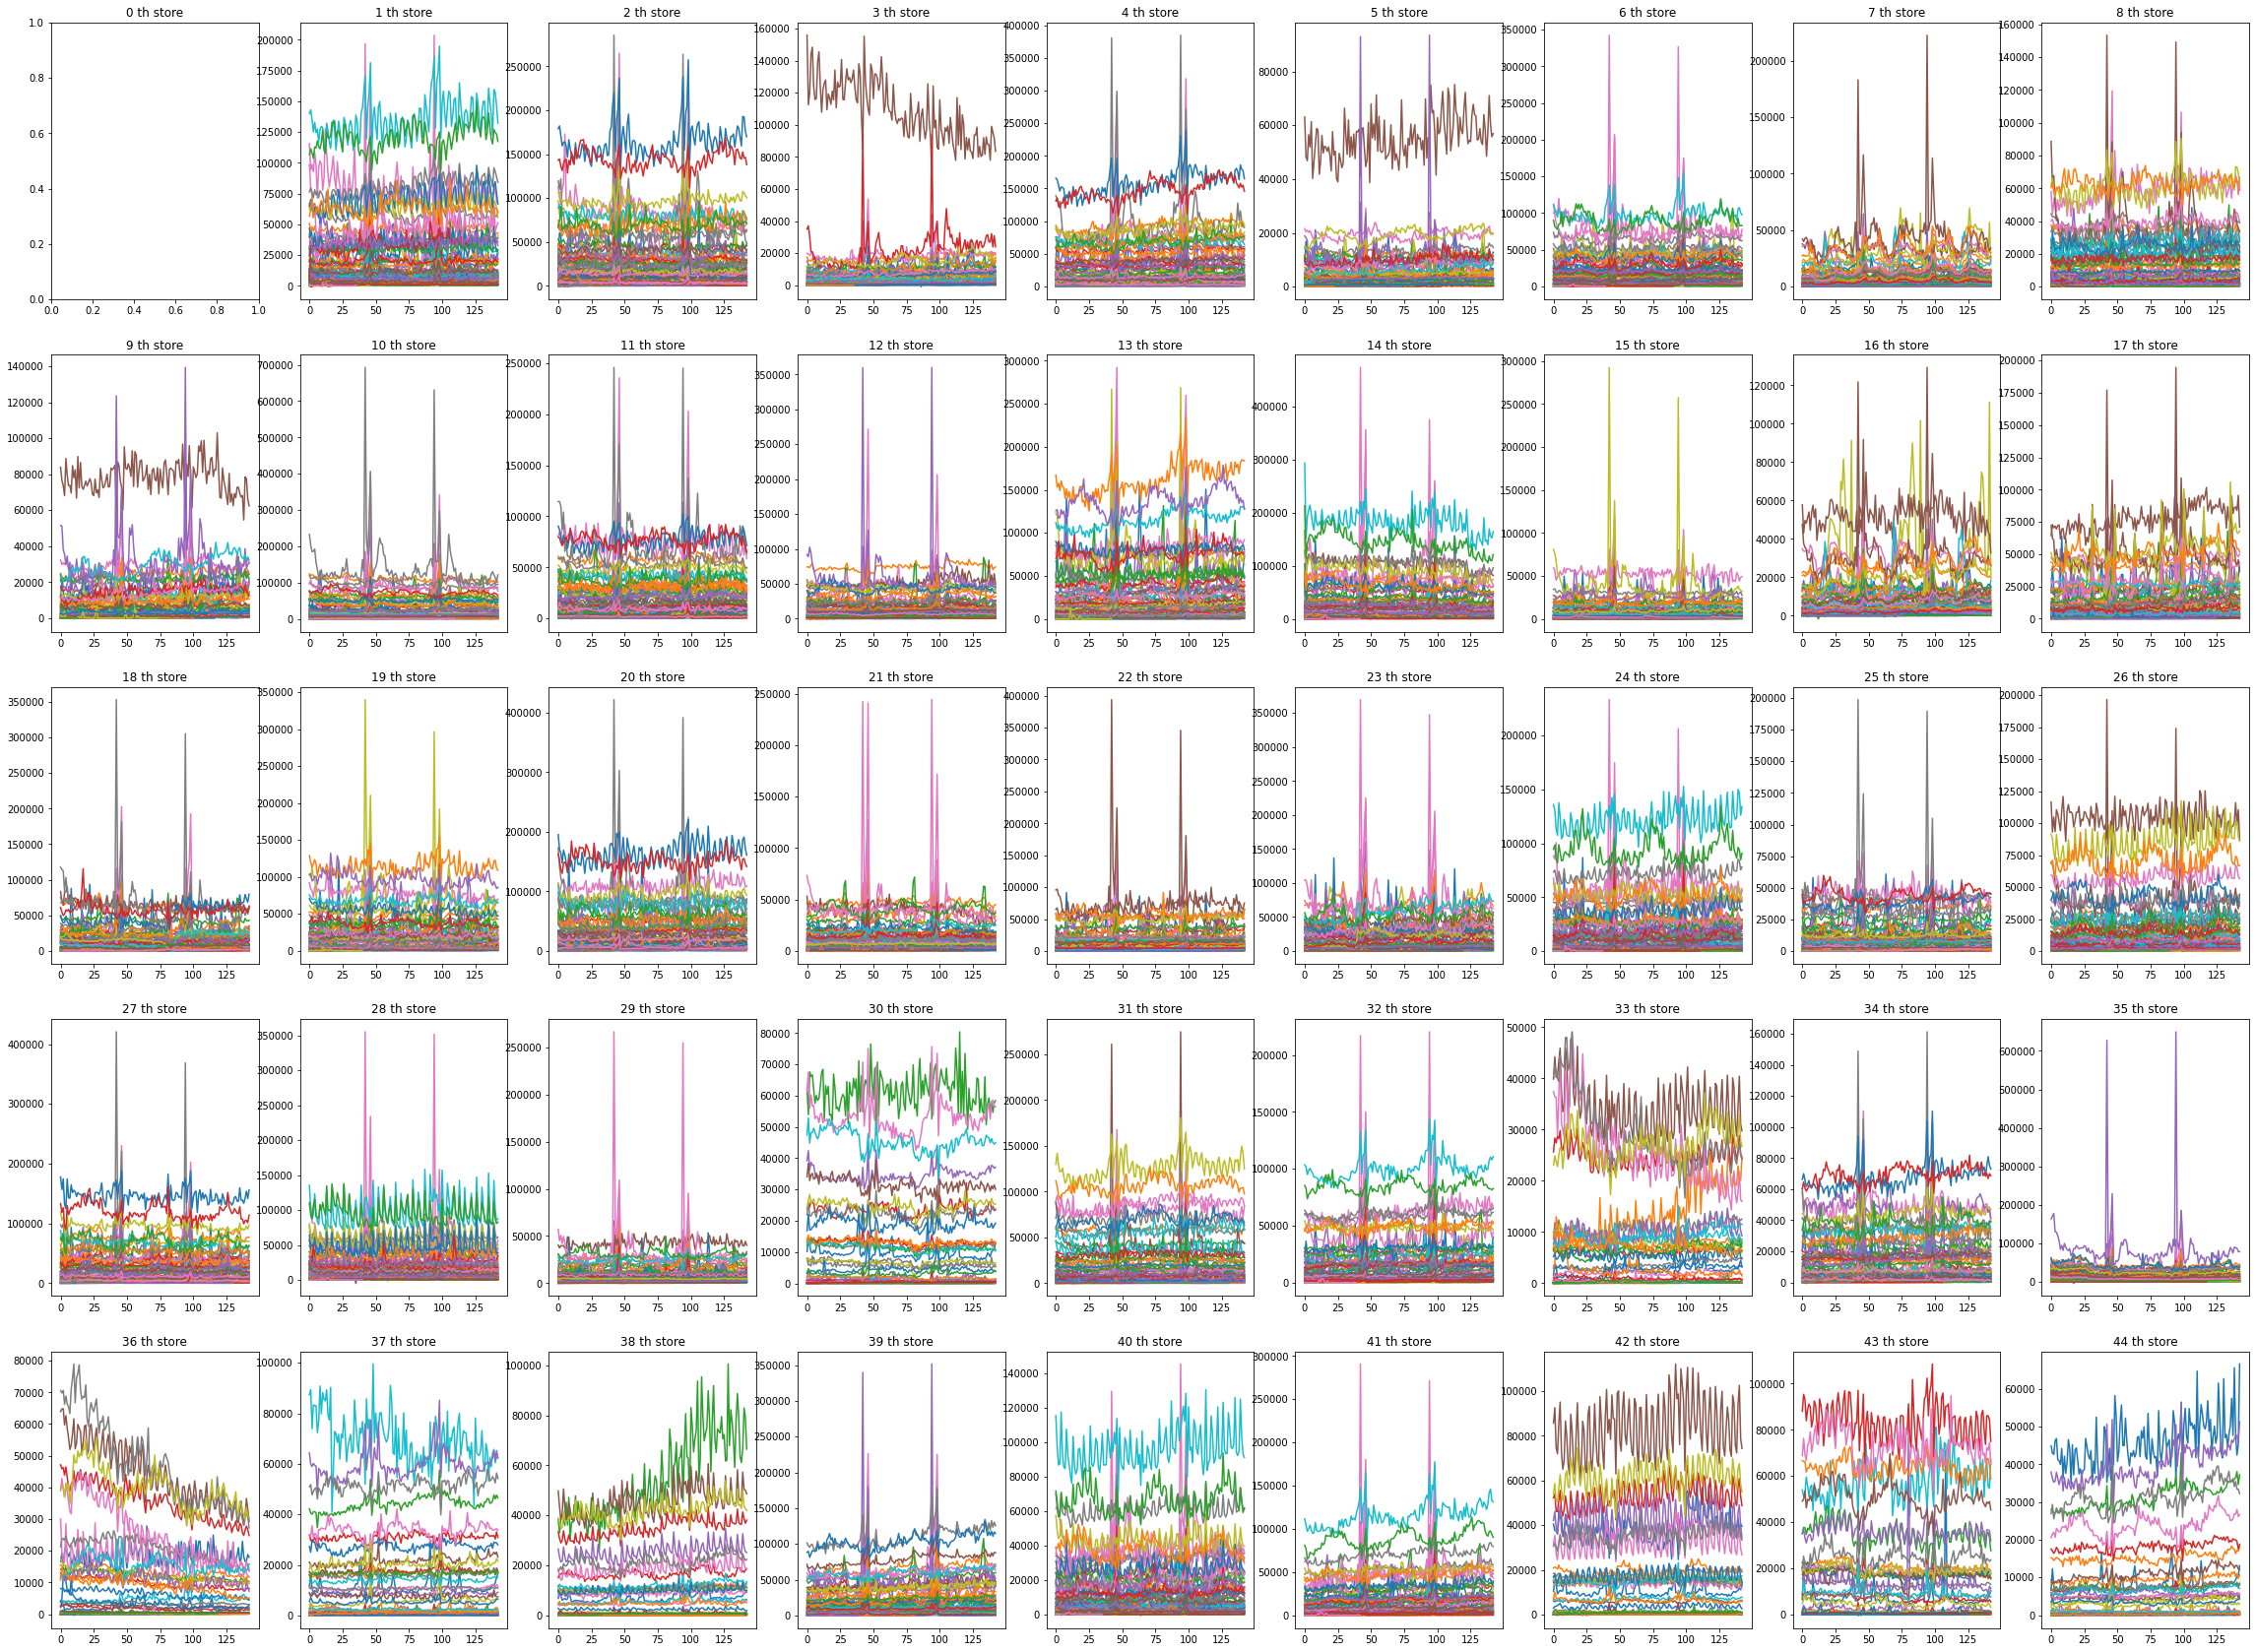

In [24]:
row, col = 5, 9
num = 0

plt.figure(figsize=(40,30))
while num < row * col:
    for store in range(45):
        flg = True
        num += 1
        plt.subplot(row, col, num)
        plt.title('{} th store'.format(store))
        for dept in range(100): 
            try:
                per_store = df_all_train.groupby('Store').get_group(store)
                per_dept = per_store.groupby('Dept').get_group(dept).set_index('Date')

                train_sales = per_dept['Weekly_Sales']
                test_sales = per_dept['Weekly_Sales']

                
                plt.plot(range(len(train_sales)), train_sales)

            except:
                flg = False
    

plt.show()
plt.close()

### (e)Storeごとの '各' DeptについてWeekly_Salesの描画

ValueError: num must be 1 <= num <= 20, not 21

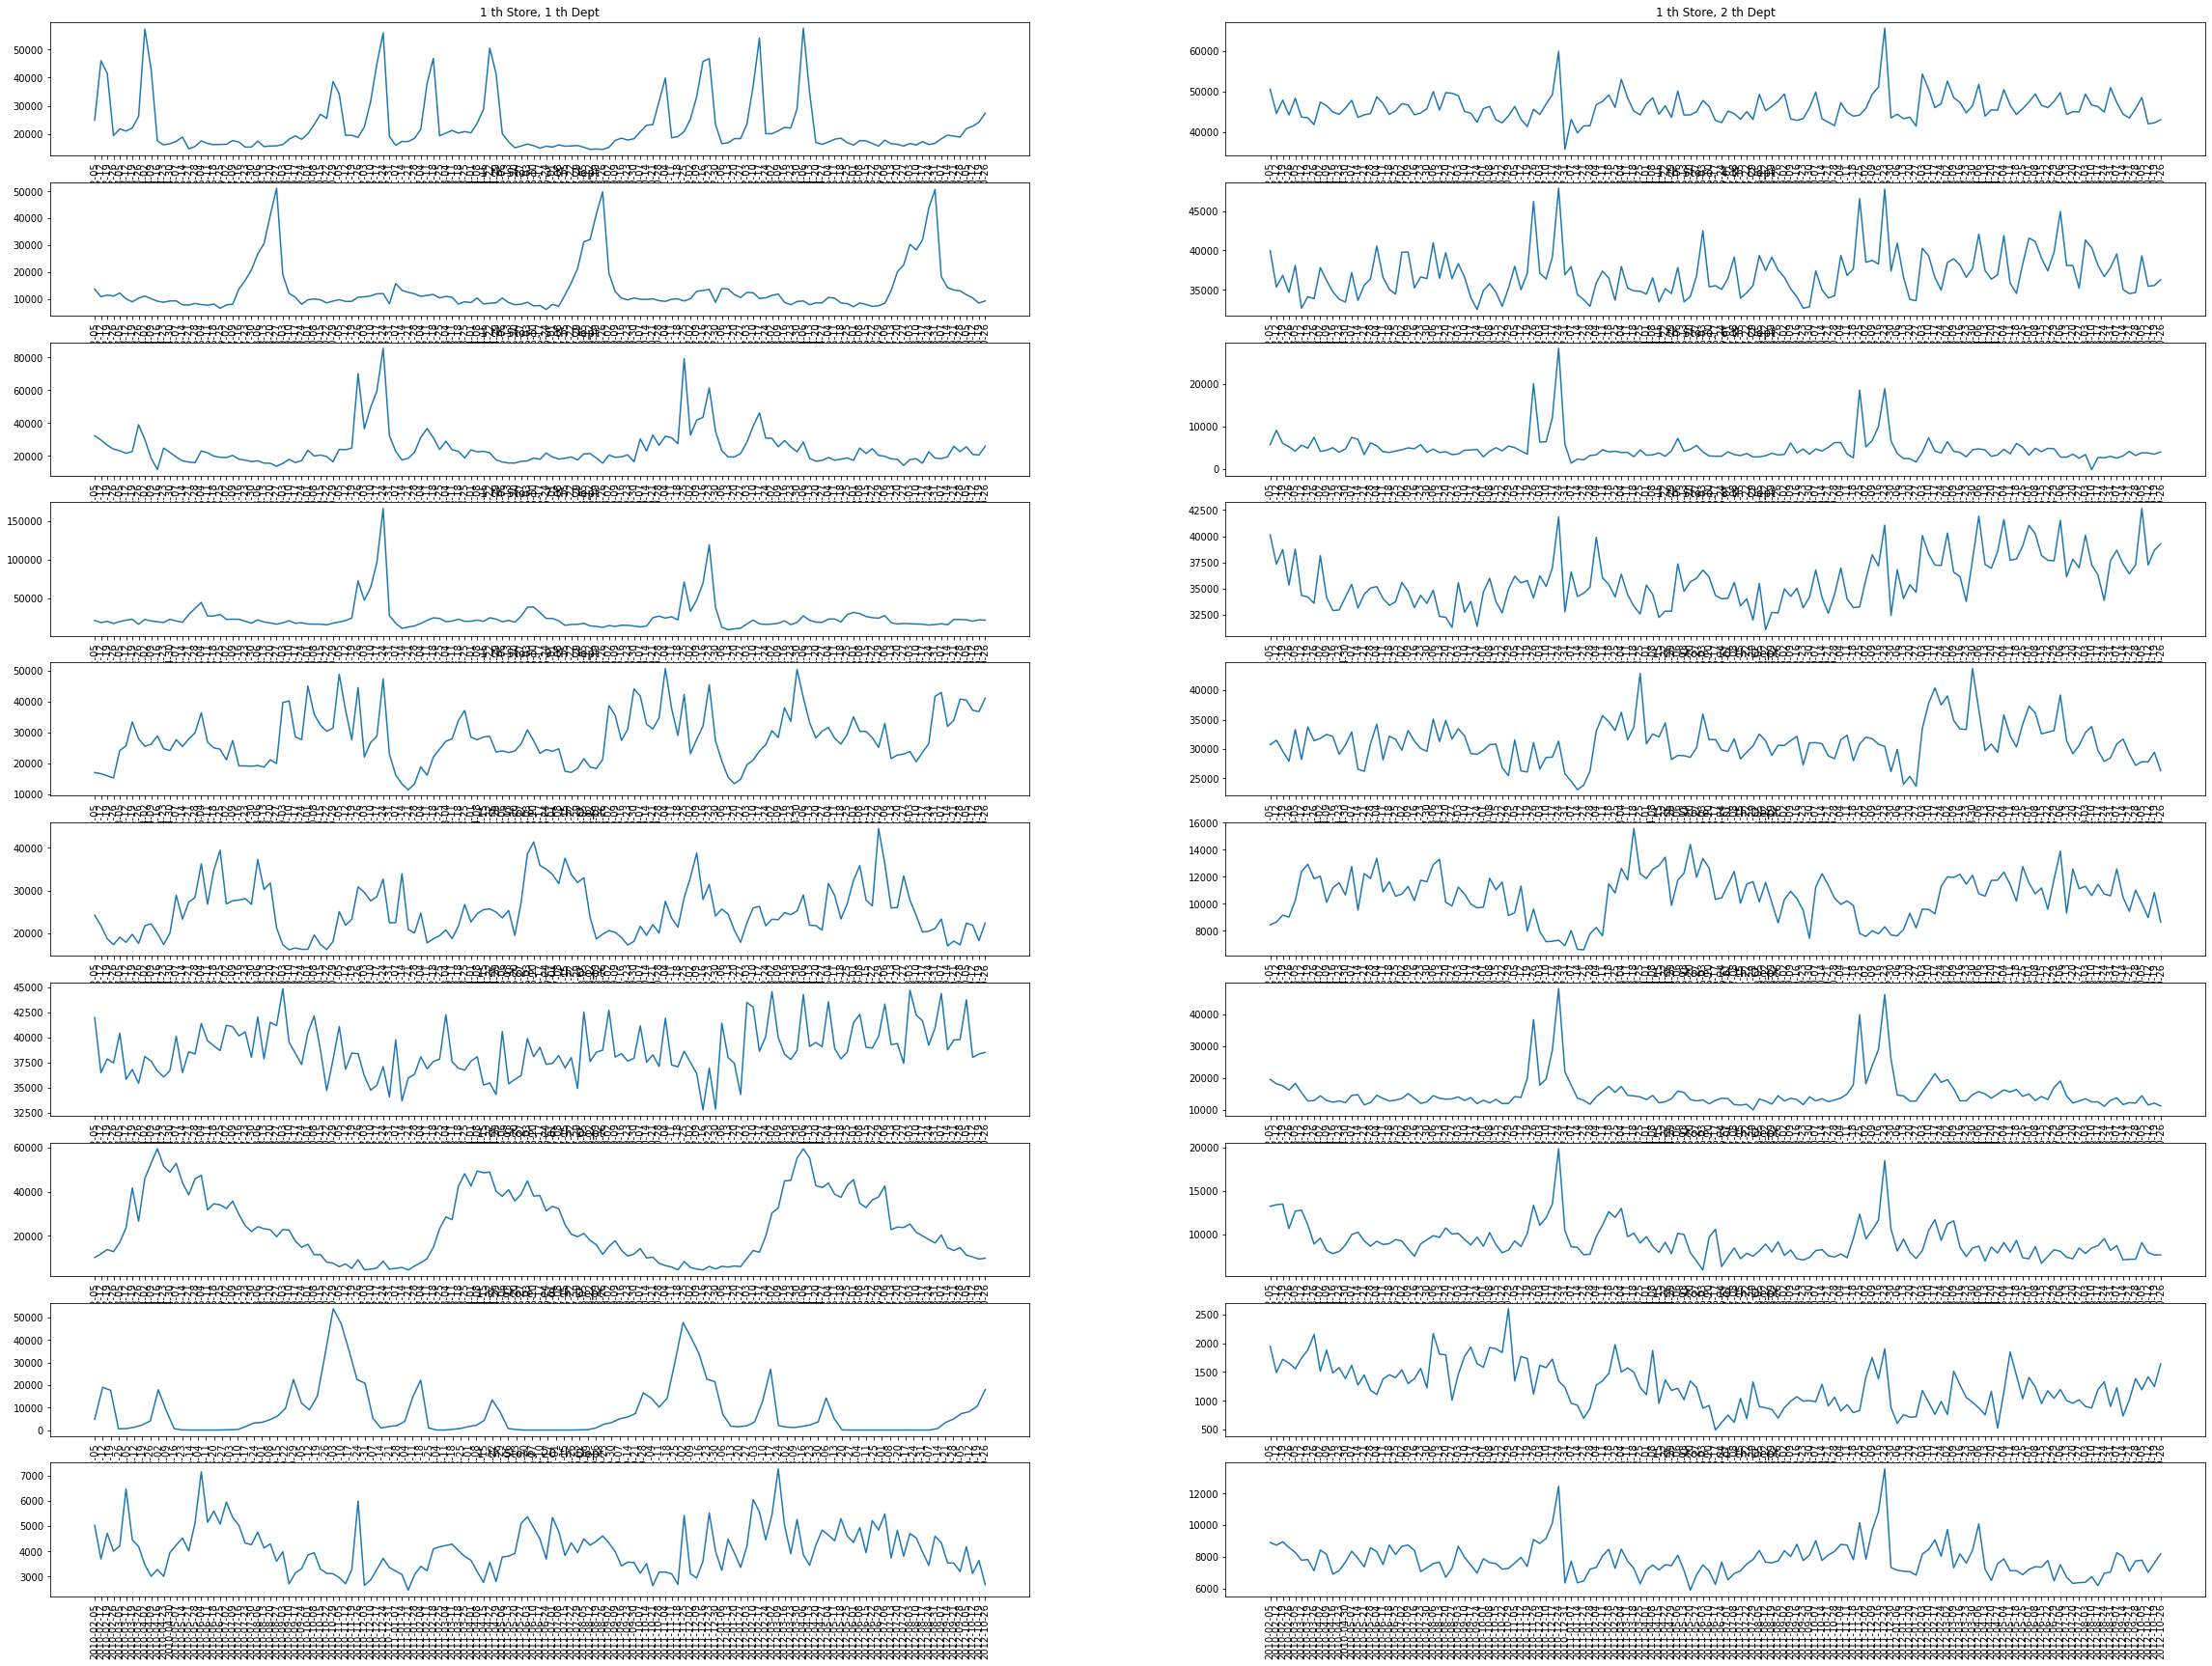

In [25]:
store_dept_list = sales_train[['Store','Dept']].drop_duplicates().values.tolist()
row, col = 10,2 
num = 0

plt.figure(figsize=(40,30))

while num < row * col:
    for idx, (tempStore, tempDept) in enumerate(store_dept_list):
        num += 1
        tmpdf = sales_train.groupby(['Store', 'Dept']).get_group((tempStore, tempDept))
        weekly_sales = tmpdf['Weekly_Sales']
        date = tmpdf['Date']
        plt.subplot(row, col, num)
        plt.title('{Store} th Store, {Dept} th Dept'.format(Store=tempStore, Dept=tempDept))
        plt.plot(date, weekly_sales)
        #plt.xticks(rotation=90)
        plt.xticks(np.arange(0, len(date)), date, rotation=90)

plt.tight_layout()
plt.show()
plt.close()

### (f)Weekly_Salesについて、Storeごとの '各' Deptについて基本的に143期あるが、一部かけている

(array([ 118.,   58.,   41.,   27.,   24.,   10.,   17.,   15.,   18.,
           6.,   10.,   13.,    7.,    9.,   15.,    5.,   10.,   22.,
           6.,   12.,   15.,   11.,    7.,   22.,   22.,   17.,   23.,
          29.,   28., 2714.]),
 array([  1.        ,   5.73333333,  10.46666667,  15.2       ,
         19.93333333,  24.66666667,  29.4       ,  34.13333333,
         38.86666667,  43.6       ,  48.33333333,  53.06666667,
         57.8       ,  62.53333333,  67.26666667,  72.        ,
         76.73333333,  81.46666667,  86.2       ,  90.93333333,
         95.66666667, 100.4       , 105.13333333, 109.86666667,
        114.6       , 119.33333333, 124.06666667, 128.8       ,
        133.53333333, 138.26666667, 143.        ]),
 <BarContainer object of 30 artists>)

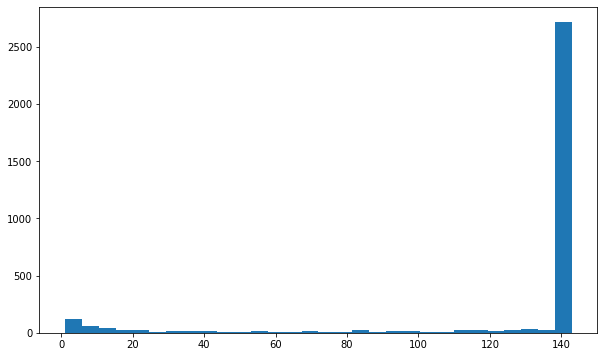

In [27]:
nums = []

check_df = sales_train #sales_test
store_dept_list = check_df[['Store','Dept']].drop_duplicates().values.tolist()
for idx, (tempStore, tempDept) in enumerate(store_dept_list):
    df = check_df[(check_df['Store'] == tempStore) & (check_df['Dept'] == tempDept)]

    
    nums.append(len(df))
    
plt.figure(figsize=(10, 6))
plt.hist(nums, bins=30)

### 特徴量ごとのWeekly_Salesとの相関

<AxesSubplot:>

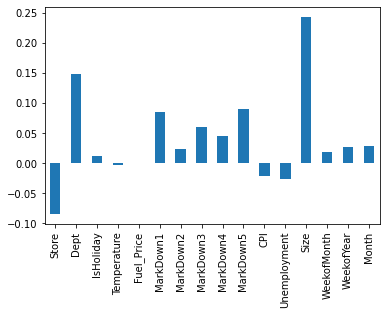

In [28]:
df_all_train_corr = df_all_train[df_all_train.columns[:]].corr()['Weekly_Sales'][:]
df_all_train_corr = df_all_train_corr.drop("Weekly_Sales")
df_all_train_corr.plot.bar()